In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import plotly.graph_objects as go

print(np.__version__)

1.21.5


In [2]:
ll

NameError: name 'll' is not defined

In [2]:
#%run data_preparation.ipynb
#%run functions.ipynb

# Open all files / computing intensive
#base_folder_path = '/workspaces/nyc_bike_rental//data'
#start_year = 2015
#end_year = 2018
#cd = combine_csv_files_in_years(base_folder_path,start_year,end_year)

#Cat = list(cd.columns)
#for i in range(15):
 # cd[Cat[i]] = cd[Cat[i]].fillna(cd[Cat[i+15]])
#Bad_Cat = Cat[15:30]
#cd = cd.drop(columns=Bad_Cat)

In [2]:
%run data_preparation.ipynb

Accessible dataframes    Description                            # of columns  
data_2019                Gives data for 2019-Baseline           15
station_data             Existing stations in NYC from Lyft      6


In [3]:
data_2019.head()
cd = data_2019

In [5]:


#cd.rename(columns={"tripduration": "Trip Duration",
 #               "starttime": "Start Time", 
  #              "stoptime": "Stop Time",  
#                "start station id": "Start Station ID",
 #               "start station latitude": "Start Station Latitude", 
 #               "start station longitude": "Start Station Longitude",
 ##               "end station id": "End Station ID",
  #              "end station name": "End Station Name",
   #             "end station latitude": "End Station Latitude", 
    #            "end station longitude": "End Station Longitude"})

In [4]:
# Extract year, date, hour, and time into separate columns

#cd['starttime'] = pd.to_datetime(cd['starttime'], format='%Y-%m-%d %H:%M:%S', errors='raise')
#cd['stoptime'] = pd.to_datetime(cd['stoptime'], format='%Y-%m-%d %H:%M:%S', errors='raise')
#print(cd['Start Time'].dt.year)

#cd['Date'] = cd['starttime'].dt.date
#cd['Hour'] = cd['starttime'].dt.hour
#cd['Time'] = cd['starttime'].dt.time
#cd['Year'] = cd['starttime'].dt.year

#first_4_chars = cd['starttime'].str[:4]
#years = pd.to_numeric(first_4_chars, errors='coerce')
#time = cd['Start Time'].str[11:16].to_list()

#cd['Years'] = pd.to_numeric(first_4_chars, errors='coerce')                                  # Will not add new Dataframe column.....
#cd['Times'] = cd['starttime'].str[11:16].to_list()
#cd['Month'] = pd.to_numeric(cd['starttime'].str[5:7], errors='coerce')  

#type(time)

In [10]:
cd.dtypes
cd['year'] = cd['starttime'].dt.year

In [11]:
years_list = ['2015','2016','2017','2018','2019']
Trips = []
for y in years_list:
    test = cd[cd['year'] == y]
    Trips.append(len(test))

plt.bar(years_list, Trips)
plt.xlabel('Year')
plt.ylabel('Trips')
plt.show()

: 

In [7]:

    test = cd[(cd['Start Time'].str[:4] == '2015') & (cd['Birth Year'] == 1977 )]
    test.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Years,Times,Month
8,382.0,2015-12-01 06:06:29,2015-12-01 06:12:51,3207.0,Oakland Ave,40.737604,-74.052478,3195.0,Sip Ave,40.730743,-74.063784,24411.0,Subscriber,1977.0,1.0,2015,06:06,12
25,132.0,2015-12-01 07:38:05,2015-12-01 07:40:17,3213.0,Van Vorst Park,40.718489,-74.047727,3186.0,Grove St PATH,40.719586,-74.043117,24409.0,Subscriber,1977.0,1.0,2015,07:38,12
26,300.0,2015-12-01 07:40:52,2015-12-01 07:45:52,3203.0,Hamilton Park,40.727596,-74.044247,3186.0,Grove St PATH,40.719586,-74.043117,24541.0,Subscriber,1977.0,1.0,2015,07:40,12
28,299.0,2015-12-01 07:42:28,2015-12-01 07:47:28,3186.0,Grove St PATH,40.719586,-74.043117,3184.0,Paulus Hook,40.714145,-74.033552,24700.0,Subscriber,1977.0,1.0,2015,07:42,12
30,324.0,2015-12-01 07:48:38,2015-12-01 07:54:02,3207.0,Oakland Ave,40.737604,-74.052478,3215.0,Central Ave,40.746730,-74.049251,24447.0,Subscriber,1977.0,2.0,2015,07:48,12


In [141]:
#time by minutes - takes way to long.... see next box
times_uq = sorted(set(time))
times_short = times_uq[0:10]
times_count = []
for t in times_short:
    test = cd[cd['Start Time'].str[11:16] == t]
    times_count.append(len(test))
print(times_count)

[228, 256, 293, 349, 294, 254, 287, 261, 259, 235]


[10968, 5993, 3390, 2220, 3304, 13001, 38985, 91994, 158577, 82541, 53449, 52095, 59298, 59609, 56463, 59533, 73497, 125911, 139049, 99911, 68861, 46125, 31281, 18179]


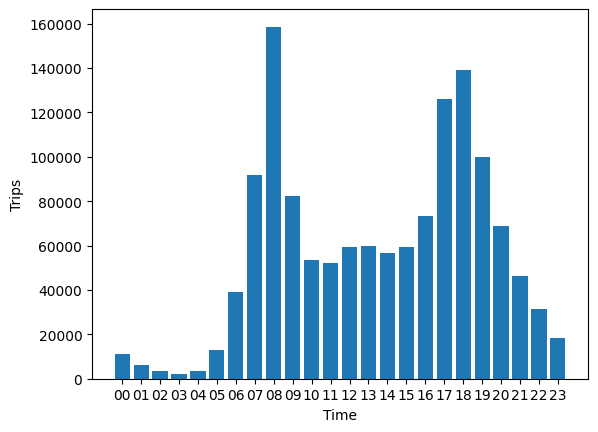

In [8]:
hours = cd['Start Time'].str[11:13].to_list()
hours_uq = sorted(set(hours))


hours_count = []
for t in hours_uq:
    test = cd[cd['Start Time'].str[11:13] == t]
    hours_count.append(len(test))
print(hours_count)

plt.bar(hours_uq, hours_count)
plt.xlabel('Time')
plt.ylabel('Trips')
plt.show()

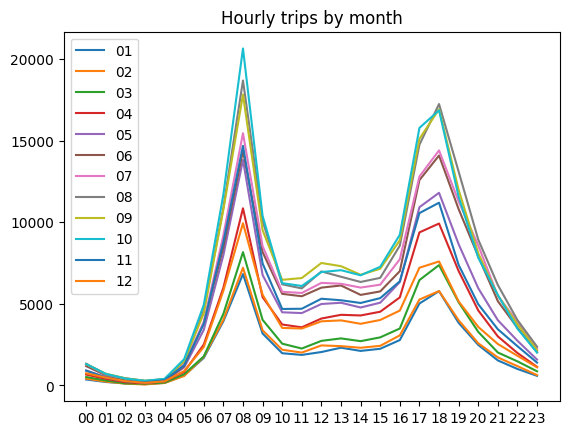

In [9]:
months = [ '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
plt.title('Hourly trips by month')
for m in months:
    hours_count = []
    for t in hours_uq:  
        test = cd[(cd['Start Time'].str[11:13] == t) & (cd['Start Time'].str[5:7] == m) ]
        hours_count.append(len(test))
    plt.plot(hours_uq, hours_count, label=m)
plt.legend()
plt.show()


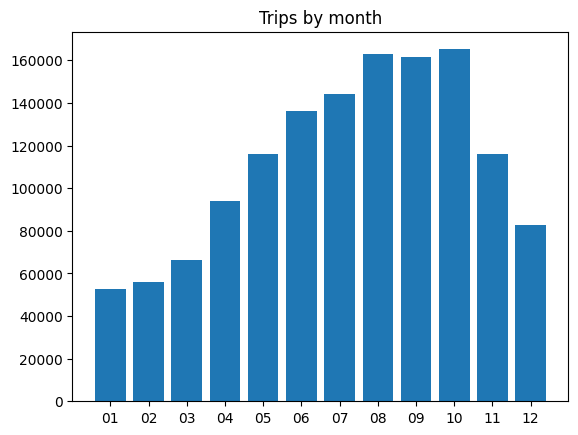

In [10]:
months = [ '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
plt.title('Trips by month')
month_count=[]
for m in months:  
        test = cd[ (cd['Start Time'].str[5:7] == m) ]
        month_count.append(len(test))
plt.bar(months, month_count)
plt.show()

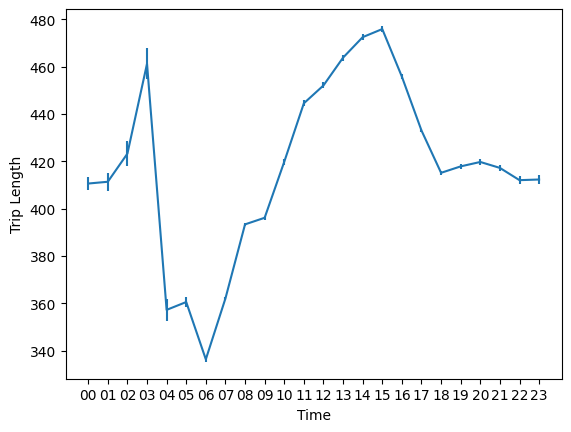

In [12]:
cd1=cd[cd['Trip Duration']<1440]
trip_duration= []
trip_error = []
for t in hours_uq:
    test = cd1[(cd1['Start Time'].str[11:13] == t)]
    trip_duration.append(test['Trip Duration'].mean())
    std_err = test['Trip Duration'].std() / np.sqrt(len( test['Trip Duration']))
    trip_error.append(std_err)


plt.errorbar(hours_uq, trip_duration, yerr=trip_error)
plt.xlabel('Time')
plt.ylabel('Trip Length')
plt.show()

10.0


In [13]:
#print(Cat[3:7])
s_stat = cd[Cat[3:7]].rename(columns={Cat[3]: "ID",Cat[4]: "Name", Cat[5]: "Latitude", Cat[6]: "Longitude"})
e_stat = cd[Cat[7:11]].rename(columns={Cat[7]: "ID",Cat[8]: "Name", Cat[9]: "Latitude", Cat[10]: "Longitude"})

stations = (
    pd.concat([s_stat,e_stat])
    .drop_duplicates()
    .set_index('ID')
    .sort_index()
)

stations

,Name,Latitude,Longitude
ID,,,
79.0,Franklin St & W Broadway,40.719116,-74.006667
116.0,W 17 St & 8 Ave,40.741776,-74.001497
127.0,Barrow St & Hudson St,40.731724,-74.006744
128.0,MacDougal St & Prince St,40.727103,-74.002971
146.0,Hudson St & Reade St,40.716250,-74.009106
...,...,...,...
3694.0,Jackson Square,40.711130,-74.078900
3709.0,W 15 St & 6 Ave,40.738046,-73.996430
3750.0,Forrest Tech Shop (parts testing),40.703006,-73.932077


In [14]:
# cd['Start Station Name'].value_counts()['Jackson Square	']
station_start_count = []
station_end_count = []
for station_name in stations['Name']:
    station_name_with_tab = station_name + '\t'
    station_name_cleaned = station_name_with_tab.strip()  # Remove leading and trailing whitespace
    #print(f"Checking station name: '{station_name_cleaned}'")
    s_count = cd['Start Station Name'].value_counts().get(station_name_cleaned, 0)
    station_start_count.append(s_count)
    e_count = cd['End Station Name'].value_counts().get(station_name_cleaned, 0)
    station_end_count.append(e_count)


print(station_start_count)
print(station_end_count)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66790, 35602, 37206, 158174, 39064, 1167, 730, 2379, 3051, 29868, 12039, 27470, 73402, 73402, 8233, 2701, 0, 9353, 41245, 588, 6448, 61964, 84199, 23233, 11803, 19696, 35686, 16387, 40816, 10472, 37951, 32806, 3637, 0, 525, 643, 10082, 0, 17227, 0, 0, 0, 0, 0, 38796, 8068, 25052, 27754, 317, 27820, 20743, 114, 25521, 36648, 4221, 22698, 20557, 9014, 7156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7813, 6988, 0, 0, 0, 0, 0, 18474, 32058, 14169, 0, 0, 3397, 5975, 5658, 10494, 0, 1398, 0, 0, 1563, 9027]
[1, 1, 3, 3, 5, 1, 66, 9, 1, 1, 10, 9, 4, 2, 3, 7, 2, 1,

In [15]:
stations['Start Count'] = station_start_count
stations['End Count'] = station_end_count
stations1= stations[(stations['Start Count']>10000) | (stations['End Count']>10000)  ]
stations1.head()
largestationlist = stations1['Name'].to_list()
print(len(largestationlist))

38


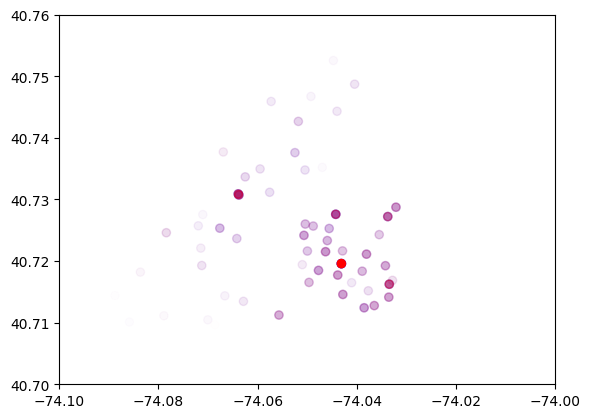

In [56]:

stations = stations[stations['Latitude'] != 0]
stations.sort_values('Latitude')
#stations['Start Count']
start_w = []
end_w =[]
for i in stations['Start Count']:
    start_w.append( i / stations['Start Count'].max())
for i in stations['End Count']:
    end_w.append( i / stations['End Count'].max())

plt.scatter(stations['Longitude'].to_list(), stations['Latitude'].to_list(),alpha =start_w, c='b')
plt.scatter(stations['Longitude'].to_list(), stations['Latitude'].to_list(),alpha =end_w, c='r')
plt.xlim(-74.1, -74.0) 
plt.ylim(40.7, 40.76) 
plt.show()

In [67]:
import folium

# Filter stations where Latitude is not 0
stations = stations[stations['Latitude'] != 0]

# Normalize 'Start Count' and 'End Count'
stations['start_w'] = stations['Start Count'] / stations['Start Count'].max()
stations['end_w'] = stations['End Count'] / stations['End Count'].max()

# Create a map centered around a specific latitude and longitude
mymap = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

# Add markers for each station
for idx, station in stations.iterrows():
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=5,
                        fill=True,
                        fill_opacity=station['start_w'],  # Using 'Start Count' for opacity
                        color='blue').add_to(mymap)
    
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=5,
                        fill=True,
                        fill_opacity=station['end_w'],  # Using 'End Count' for opacity
                        color='red').add_to(mymap)

# Display the map
mymap

In [64]:
import folium

# Create a map centered around a specific latitude and longitude
mymap = folium.Map(location=[40.7128, -74.0060], zoom_start=100)

# Sample longitude and latitude points
points = [(40.7128, -74.0060), (34.0522, -118.2437), (51.5074, -0.1278)]  # New York, Los Angeles, London

# Add markers for each point
for point in points:
    folium.Marker(location=point).add_to(mymap)
mymap

In [61]:
for s in largestationlist:
    station_name_with_tab = s + '\t'
    station_name_cleaned = station_name_with_tab.strip()  # Remove leading and trailing whitespace

    s_count = cd['Start Station Name'].value_counts().get(station_name_cleaned, 0)

In [17]:
#    source = []
#    target = []
#    for s in range(len(largestationlist)):
#        for t in range(len(largestationlist)):
#        source.append(largestationlist[s])
#        target.append(largestationlist[t])
#
 #   value = []
 #   for i in range(len(largestationlist)):
  #      start = source[i]
#        end = target[i]
#        v = len(cd[(cd['Start Station Name'] == start) & (cd['End Station Name'] == end)])
#        value.append(v)
#    print(value)

#    link = dict(source = source, target = target, value = value)
#    data = go.Sankey(link = link)

 #   fig = go.Figure(data)
  #  fig.show()



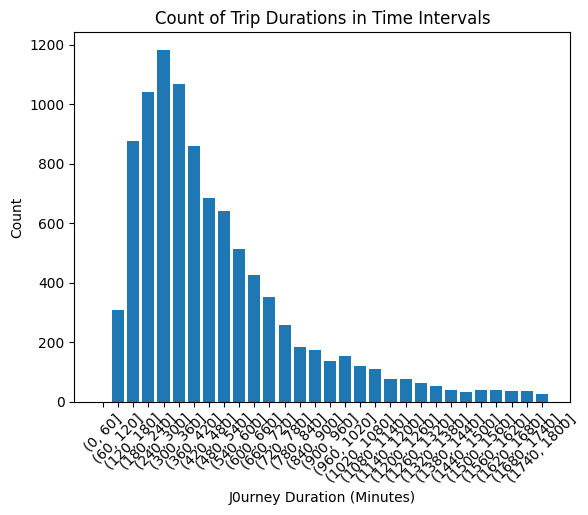

In [29]:
cd2 = cd[cd['Trip Duration'] < 1000000].iloc[1:10000]
#time_intervals = [0, 60, 300, 600, 1200, 1800, 6000, 12000]

time_intervals = []
for i in range(31):
    x=i*60
    time_intervals.append(x)
#time_intervals.append(6000)

# Categorize 'Trip Duration' into time intervals
cd2['Time Interval'] = pd.cut(cd2['Trip Duration'], bins=time_intervals)
# Count the occurrences in each time interval
counts = cd2['Time Interval'].value_counts().sort_index()
#counts = pd.cut(cd2['Trip Duration'], bins=time_intervals).value_counts()

plt.bar(x=counts.index.astype(str), height=counts)
plt.xlabel('J0urney Duration (Minutes)')
plt.ylabel('Count')
plt.title('Count of Trip Durations in Time Intervals')
plt.xticks(rotation=45)
plt.show()
